# TD7 : Time series analysis

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [2]:
consumption = pd.read_csv("data/consumption.csv", index_col=0, parse_dates=True)
consumption

,V1
1970-01-01,0.612277
1970-04-01,0.454930
1970-07-01,0.874673
1970-10-01,-0.272514
1971-01-01,1.892187
...,...
2009-10-01,0.109329
2010-01-01,0.671018
2010-04-01,0.717718
2010-07-01,0.653143


In [3]:
assert(consumption.shape == (164, 1))
assert(type(consumption.index) is pd.core.indexes.datetimes.DatetimeIndex)

In [4]:
consumption.index.freq = "QS"

Text(0.5, 0, 'Year')

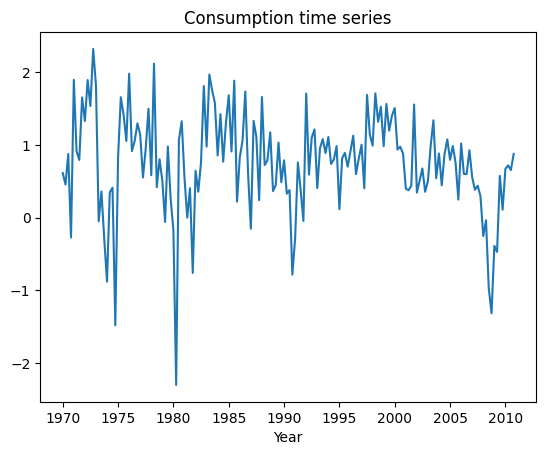

In [5]:
plt.plot(consumption)
plt.title("Consumption time series")
plt.xlabel("Year")

## Augmented Dickey-Fuller (test of stationarity)

In [6]:
from statsmodels.tsa.stattools import adfuller

alpha = 0.95

pval = adfuller(consumption, autolag="AIC")[1]
if pval < 1 - alpha:
    print("Stationary")
else:
    print("Non stationary")

Stationary


## ACF and PACF

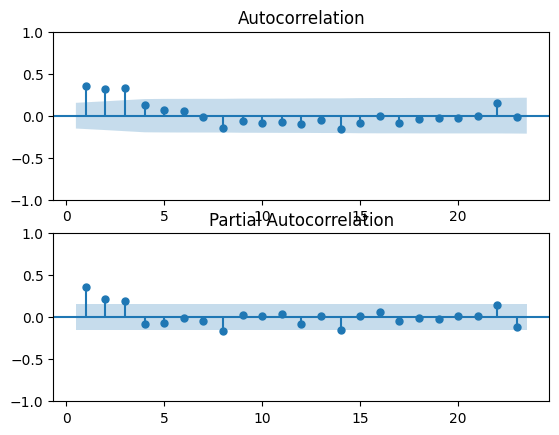

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs = plt.subplots(2, 1)
plot_acf(consumption, ax = axs[0], zero=False)
plot_pacf(consumption, ax = axs[1], zero=False)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX as sarimax

consumption_train, consumption_test = train_test_split(consumption, test_size=0.2, shuffle=False)

sarima_train = sarimax(consumption_train, order=(3, 0, 3))
sarima_train_fit = sarima_train.fit()
sarima_train_fit.summary()

C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     V1   No. Observations:                  131
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -133.131
Date:                Sat, 02 Nov 2024   AIC                            280.263
Time:                        11:57:12   BIC                            300.389
Sample:                    01-01-1970   HQIC                           288.441
                         - 07-01-2002                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2150      0.040      5.346      0.000       0.136       0.294
ar.L2         -0.2737      0.038     -7.171      0.000      -0.349      -0.199
ar.L3          0.9493      0.038     25.067      0.000       0.875       1.024
ma.L1          0.1008      0.078      1.289      0.198      -0.053       0.254
ma.L2          0.5641      0.095      5.913      0.000       0.377       0.751
ma.L3         -0.5853      0.106     -5.505      0.000      -0.794      -0.377
sigma2         0.4336      0.062      6.973      0.000       0.312       0.556
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 7.64
Prob(Q):                              0.85   Prob(JB):                         0.02
Heteroskedasticity (H):               0.22   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

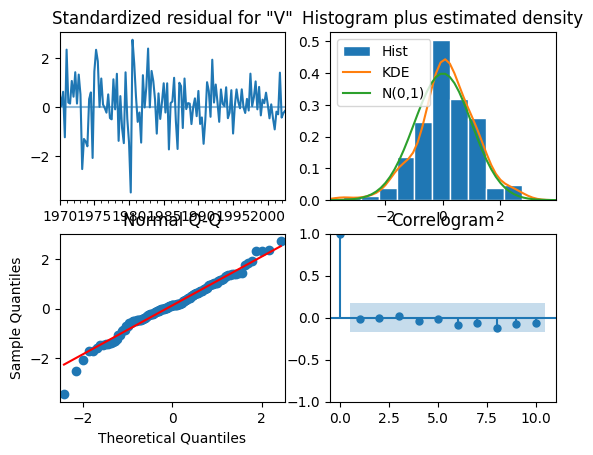

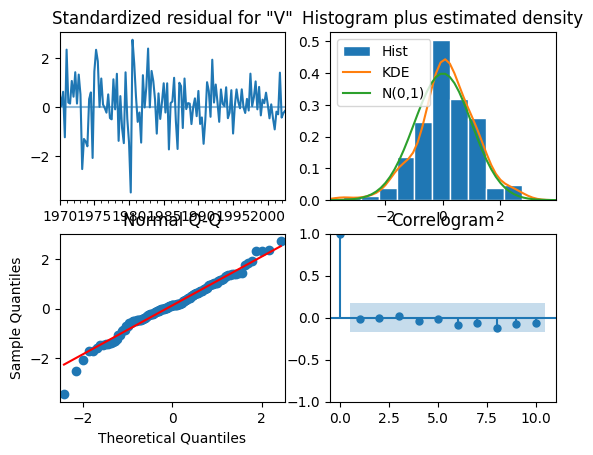

In [9]:
sarima_train_fit.plot_diagnostics()


In [10]:
sarima_test = sarimax(consumption, order = (3, 0, 3))
sarima_test_res = sarima_test.filter(sarima_train_fit.params)

In [11]:
pred = sarima_test_res.get_prediction(start = len(consumption_train), end = len(consumption) - 1)

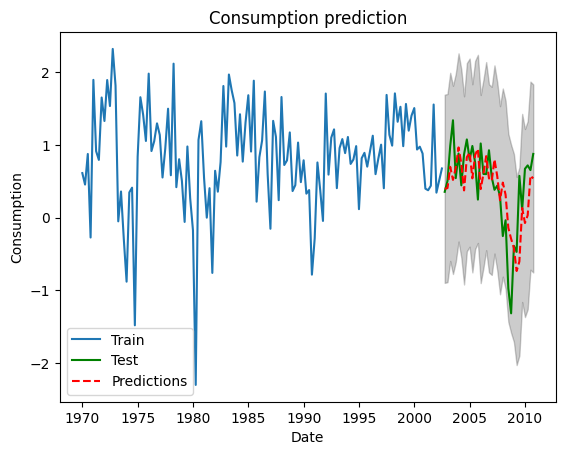

In [12]:
pred_mean = pred.predicted_mean
pred_conf = pred.conf_int()

plt.plot(consumption_train, label='Train') 
plt.plot(consumption_test, label='Test', color = "green") 
plt.plot(pred_mean, label='Predictions', color='red', ls = "--") 
plt.fill_between(pred_conf.index, pred_conf['lower V1'], pred_conf['upper V1'], color = "k", alpha = 0.2) 
plt.title("Consumption prediction") 
plt.xlabel("Date") 
plt.ylabel("Consumption") 
plt.legend() 
plt.show()

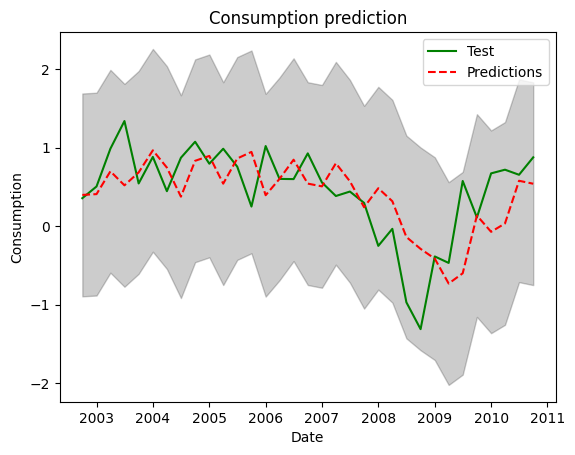

In [13]:
plt.plot(consumption_test, label='Test', color = "green") 
plt.plot(pred_mean, label='Predictions', color='red', ls = "--")
plt.fill_between(pred_conf.index, pred_conf['lower V1'], pred_conf['upper V1'], color = "k", alpha = 0.2) 
plt.title("Consumption prediction") 
plt.xlabel("Date") 
plt.ylabel("Consumption") 
plt.legend() 
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

mae = mean_absolute_error(consumption_test, pred_mean) 
rmse = root_mean_squared_error(consumption_test, pred_mean) 
print(f'MAE: {mae}') 
print(f'MSE: {rmse}')

MAE: 0.36484451078987495
MSE: 0.48259738580168465


## Problem

In [15]:
debitcards = pd.read_csv("data/debitcards.csv", index_col=0, parse_dates=True)
debitcards

,V1
2000-01-01,7204.0
2000-02-01,7335.0
2000-03-01,7812.0
2000-04-01,7413.0
2000-05-01,9136.0
...,...
2012-08-01,24920.0
2012-09-01,20325.0
2012-10-01,22038.0
2012-11-01,20988.0


Text(0.5, 0, 'Year')

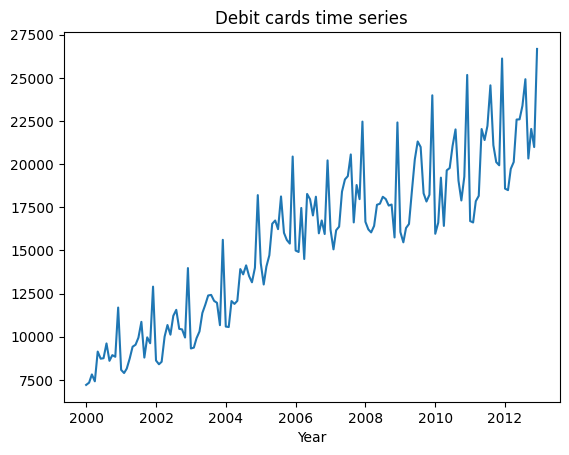

In [16]:
plt.plot(debitcards)
plt.title("Debit cards time series")
plt.xlabel("Year")

In [17]:
alpha = 0.95

pval = adfuller(debitcards, autolag="AIC")[1]
print(pval)
if pval < 1 - alpha:
    print("Stationary")
else:
    print("Non stationary")

0.7881064417185548
Non stationary


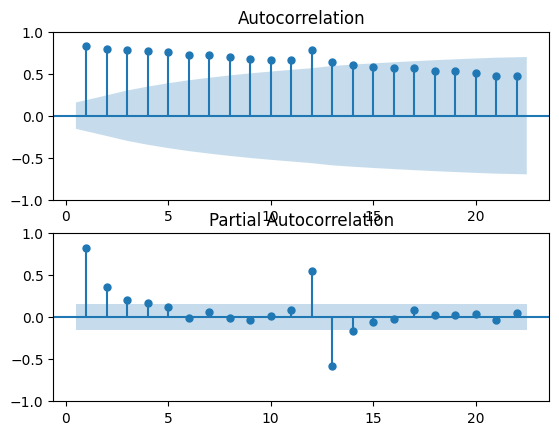

In [18]:
fig, axs = plt.subplots(2, 1)
plot_acf(debitcards, ax = axs[0], zero=False)
plot_pacf(debitcards, ax = axs[1], zero=False)
plt.show()

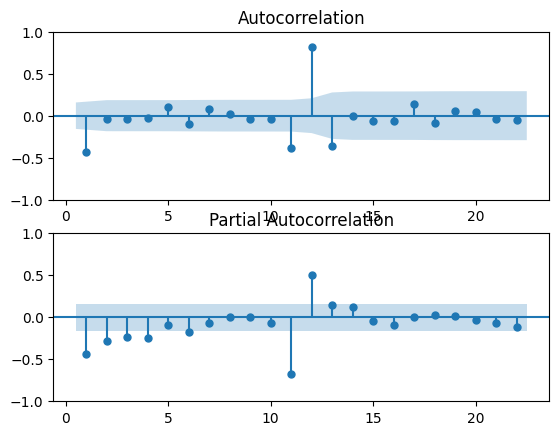

In [19]:
fig, axs = plt.subplots(2, 1)
plot_acf(debitcards.diff().dropna(), ax = axs[0], zero=False)
plot_pacf(debitcards.diff().dropna(), ax = axs[1], zero=False)
plt.show()

In [33]:
sarima = sarimax(debitcards, order = (6, 1, 4))
sarima_fit = sarima.fit()
sarima_fit.summary()

C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFou

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     V1   No. Observations:                  156
Model:               SARIMAX(6, 1, 4)   Log Likelihood               -1384.841
Date:                Sat, 02 Nov 2024   AIC                           2791.682
Time:                        12:08:09   BIC                           2825.159
Sample:                    01-01-2000   HQIC                          2805.279
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3563      0.110     -3.228      0.001      -0.573      -0.140
ar.L2          0.6787      0.127      5.350      0.000       0.430       0.927
ar.L3          0.6687      0.151      4.442      0.000       0.374       0.964
ar.L4         -0.1099      0.140     -0.786      0.432      -0.384       0.164
ar.L5          0.0777      0.118      0.659      0.510      -0.153       0.309
ar.L6         -0.1428      0.121     -1.178      0.239      -0.380       0.095
ma.L1         -0.3484      0.080     -4.382      0.000      -0.504      -0.193
ma.L2         -1.1893      0.070    -17.079      0.000      -1.326      -1.053
ma.L3         -0.3240      0.081     -4.022      0.000      -0.482      -0.166
ma.L4          0.9500      0.079     12.023      0.000       0.795       1.105
sigma2      3.742e+06   2.59e-08   1.44e+14      0.000    3.74e+06    3.74e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 4.12
Prob(Q):                              0.85   Prob(JB):                         0.13
Heteroskedasticity (H):               2.60   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.29e+29. Standard errors may be unstable.
"""

In [34]:
pred = sarima_fit.get_prediction(start = len(debitcards), end = len(debitcards) + 10)

In [35]:
pred = pred.predicted_mean

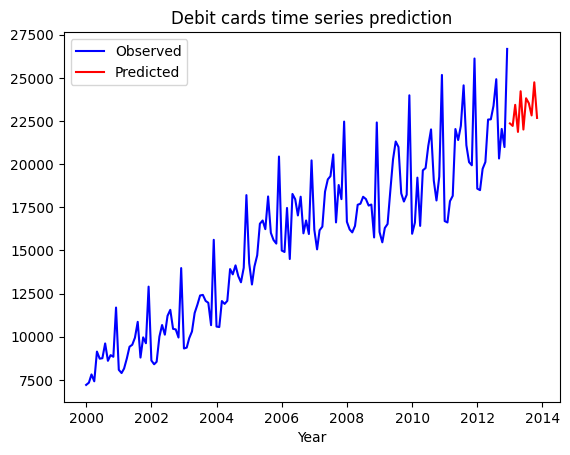

In [36]:
plt.plot(debitcards, color = "blue", label = "Observed")
plt.plot(pred, color = "red", label = "Predicted")
plt.title("Debit cards time series prediction")
plt.xlabel("Year")
plt.legend()